### Read Keithley 2400 Source Meter using Python using serial communication

__Autor: Sayemul Islam (ECE Dept., Temple University)__

You may use Serial to USB converter for this job (which I did). Make sure the driver is installed properly. There are more instructions to follow, check the code comments.

USB Serial Driver Issue?

Windows 10, 64 bit machine: "Microsoft -> USB Serial Device" driver should be used.
1. Go to Device Manager, right click on the defective serial device
2. Go to "Update Driver" 
3. Browse my computer... 
4. Let me pick...
5. Remove "Show compatible hardware" check and choose Microsoft -> USB Serial Device

In [1]:
# VISA Resource Name: USB0::0xF4ED::0xEE3A::447K15118::INSTR

from pymeasure.instruments.keithley import Keithley2400
import visa #pip install pyvisa
from datetime import datetime
import time
import openpyxl # Excel processor library
import pandas as pd
import os # To open any files in file browser
import sys # Interfacing computer HID system
import readchar # pip install readchar
import numpy as np
from decimal import Decimal
import itertools
import winsound # To access windows default audio library 
import matplotlib.pyplot as plt
from matplotlib.mlab import find
import matplotlib.animation as animation
%matplotlib inline

excelfile = 'CapturedData.xlsx'

rm = visa.ResourceManager()
rm.list_resources()

#prints (e.g.)
    #0 : GPIB0::22::INSTR : Agilent Technologies,34410A,******
    #1 : GPIB0::26::INSTR : Keithley Instruments Inc., Model 2612, *****
#keithley = Keithley2400(resources[0])

('ASRL1::INSTR', 'ASRL3::INSTR', 'ASRL7::INSTR', 'ASRL13::INSTR')

In [2]:
src_mtr = rm.open_resource(rm.list_resources()[3]) #    <- last one usually
src_mtr.baud_rate = 9600  #   < -- Manually set the same baud rate with the device
src_mtr.timeout = 1000 #   < -- Give it extra time if timeout error occurs
src_mtr.read_termination = '\n'

src_mtr.write("*IDN?") 
src_mtr.read()

# Expected Output: 'KEITHLEY INSTRUMENTS INC.,MODEL 2400,0637357,C03   May 10 1996 10:32:55/A02  '

'KEITHLEY INSTRUMENTS INC.,MODEL 2400,0637357,C03   May 10 1996 10:32:55/A02  '

In [4]:
# 1. Set measurement mode (V,I,R) -> Automatic
# 2. Set voltage or current compliance value
# 3. Measure the value (V,I,R)

#----------------Optional: Disable Display for faster operation----------------

#src_mtr.write(':DISPlay:ENABle OFF')
#src_mtr.write(':DISPlay:ENABle ON')

#------------------------------------------------------------------------------

#src_mtr.write(':SENSe:VOLTage:PROTection 5')  #     <-- Set V Compliance 5V
#src_mtr.query_ascii_values(':MEAS:VOLTage:DC?') # 1st array object

#------------------------------------------------------------------------------

#src_mtr.write(':SENSe:CURRent:PROTection 0.005')  #     <-- Set I Compliance 5mA
#src_mtr.query_ascii_values(':MEAS:CURRent:DC?')

#------------------------------------------------------------------------------
#src_mtr.query_ascii_values(':MEAS:RESistance?') # 3rd array object


In [7]:
#############################################################################################################################

In [5]:
# # Measure DC voltage

# def Measure():
#     global DC_V
#     src_mtr.write(':SOUR:FUNC CURR') # I Source mode
#     src_mtr.write(':SENSe:FUNC "VOLT"') # Sensing Voltage
#     #src_mtr.write(':SENSe:VOLTage:PROTection 5')  #     <-- Set V Compliance 5V, by default it's 21V
#     DC_V = src_mtr.query_ascii_values(':MEAS:VOLTage:DC?')   # Measuring here
#     DC_V = DC_V[0] 
#     return DC_V    

In [6]:
# Measure DC current

def Measure():
    global DC_I
    src_mtr.write(':SOUR:FUNC VOLT') # V Source mode
    src_mtr.write(':SENSe:FUNC "CURR"') # Sensing Current
    src_mtr.write(':SENSe:CURRent:PROTection 0.005')#  <-- Set I Compliance 5mA
    DC_I = src_mtr.query_ascii_values(':MEAS:CURRent:DC?')  # Measuring here
    DC_I = DC_I[1] 
    return DC_I    

In [ ]:
# # Measure Resistance

# def Measure():
#     global R
#     src_mtr.write(':SOUR:FUNC CURR') # I Source mode only
#     #src_mtr.write(':SENSe:VOLTage:PROTection 0.1')  #     <-- Set V Compliance 5V, by default it's 21V
    
#     R = src_mtr.query_ascii_values(':MEAS:RES?')
#     R = R[2] 
#     return R-0.2855    ## 0.2855 / 0.2823 (no clip) is the resistance of the scope wire (update by yourself)

Scan: 1 , Value: 2.811519e-07, time: 0.36183506100000784
Scan: 2 , Value: -1.544951e-08, time: 0.3675426109999904
Scan: 3 , Value: -2.497985e-08, time: 0.36758336199999064
Scan: 4 , Value: -2.096676e-08, time: 0.36759121100000414
Scan: 5 , Value: -1.666355e-08, time: 0.3825456069999973
Scan: 6 , Value: -2.040542e-08, time: 0.3835329879999989
Scan: 7 , Value: 1.049973e-06, time: 0.3515818160000066
Scan: 8 , Value: 7.658538e-05, time: 0.38352664800000014
Scan: 9 , Value: 4.217198e-09, time: 0.36754502600000194
Scan: 10 , Value: 1.264845e-08, time: 0.367540498000011
Scan: 11 , Value: 1.676778e-08, time: 0.3675525719999939
Scan: 12 , Value: 2.448478e-08, time: 0.3835272530000111
Scan: 13 , Value: 2.153254e-08, time: 0.3835514010000054
Scan: 14 , Value: 2.38531e-08, time: 0.398506703999999
Scan: 15 , Value: 1.049864e-06, time: 0.351551630000003
Scan: 16 , Value: 9.305237e-05, time: 0.3836099619999942
Scan: 17 , Value: 1.61368e-08, time: 0.3832646350000033
Scan: 18 , Value: -1.731623e-08, ti

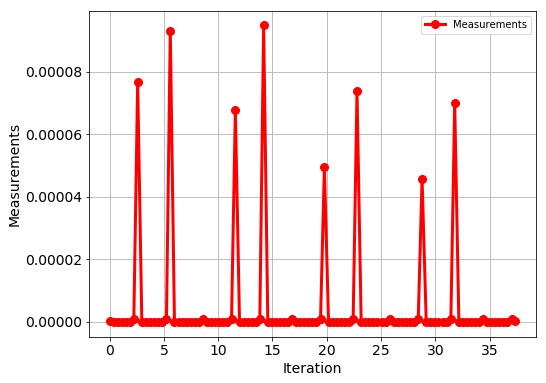

In [8]:
time_s = []
time_accu = []
Value = []
i = 0

rate = 200 # per minute 
duration = 0.5 # minutes

iterate = int(rate*duration)
init = time.perf_counter()

for i in range(0, iterate+1, 1): # Iterating i here <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    start = time.perf_counter()
    time_accu.append(start-init)
    time_s.append(duration/rate)
    Value.append(Measure())
    time.sleep((duration*60/rate)) # -0.38 delay compensated (?)
    stop = time.perf_counter()
    runtime = stop-start
    print("Scan:", i+1, ', Value: ' + str(Value[i])+ ', time:', runtime)
winsound.PlaySound("SystemHand", winsound.SND_ALIAS)
    
import csv

Data = np.column_stack((time_accu,Value))
Data = pd.DataFrame(Data)
Data.columns = ['Time','Measurements'] # set column names of Pandas dataFrame, notice that, Time is in Column 1.
export_csv = Data.to_csv ('Exported.csv', index = None, header=True)

plt.figure(figsize=(8,6))
line1 = plt.plot(time_accu,Value,'o-r',linewidth='3',label='Measurements',ms=8)
plt.legend()
plt.xlabel('Iteration',fontsize=14)
plt.ylabel('Measurements',fontsize=14)
plt.grid()
plt.tick_params(labelsize = 14)
plt.savefig('Plot_1.png', dpi=600,bbox_inches='tight')
plt.show()